In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import stumpy

In [2]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})
sns.set_context(font_scale=2, rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15})

In [3]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

In [4]:
cluster_euclidean = pd.read_csv("cluster_euclidean.csv")

In [5]:
cluster_euclidean

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,6.946352,6.957082,6.944206,6.937768,6.952790,6.950644,6.959227,6.948498,6.957082,6.944206,...,6.884120,6.888412,6.903433,6.886266,6.888412,6.890558,6.903433,6.881974,6.894850,6.892704
1,6.987762,6.994755,6.996503,6.996503,6.993007,6.994755,6.996503,6.989510,6.991259,6.989510,...,6.989510,6.984266,6.989510,6.984266,6.987762,6.991259,6.989510,6.989510,6.993007,6.993007
2,6.002959,6.005917,6.005917,6.005917,6.005917,6.014793,6.002959,6.005917,6.005917,6.002959,...,6.002959,6.005917,6.002959,6.008876,6.011834,6.008876,6.008876,6.008876,6.005917,6.005917
3,6.088496,6.070796,6.075221,6.084071,6.075221,6.059735,6.088496,6.086283,6.084071,6.090708,...,6.130531,6.117257,6.146018,6.128319,6.141593,6.128319,6.112832,6.115044,6.112832,6.110619


In [6]:
cluster_dtw = pd.read_csv("cluster_dtw.csv")

In [7]:
cluster_dtw

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,6.011780,6.999869,6.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.00000,6.000000,6.000000,6.000000,6.965309
1,6.986486,7.000000,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.00000,7.000000,6.969697,6.994898,6.991597
2,6.003704,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.00000,6.018957,6.004785,6.004785,6.009569
3,6.994458,6.000092,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,6.99572,7.000000,7.000000,6.000000,6.994280


In [8]:
import tensorflow as tf

In [9]:
cluster_sc = pd.read_csv("cluster_sc.csv")

In [10]:
cluster_sc

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,6.933661,6.985112,6.906024,6.985577,6.872340,6.970370,6.990291,6.980149,6.889688,6.985258,...,6.673246,6.950372,6.957845,6.726457,6.905797,6.955665,6.933002,6.752294,6.954217,6.856448
1,6.979688,6.998433,6.998430,6.992151,6.975155,6.995290,6.998466,6.998430,6.987480,6.968944,...,6.993730,6.990581,6.993721,6.982839,6.992151,6.993721,6.995290,6.987461,6.995305,6.993721
2,6.002890,6.008646,6.000000,6.000000,6.002890,6.025788,6.002890,6.000000,6.017241,6.002890,...,6.002890,6.000000,6.002890,6.011527,6.002890,6.008671,6.005764,6.014368,6.002890,6.002890
3,6.123913,6.024123,6.029412,6.181624,6.028761,6.063205,6.024554,6.052036,6.216387,6.027149,...,6.038375,6.052036,6.218615,6.042735,6.291925,6.081858,6.020952,6.056561,6.107822,6.186722


In [11]:
cluster_ip = pd.read_csv("cluster_ip.csv")

In [12]:
cluster_ip

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,6.133152,6.195062,6.119593,6.027100,6.013667,6.032086,6.436975,6.010753,6.021563,6.002717,...,6.013587,6.006276,6.042553,6.024324,6.506870,6.034574,6.033735,6.246269,6.156658,6.149457
1,6.992410,6.996205,7.000000,6.996205,6.996212,6.975701,7.000000,7.000000,7.000000,7.000000,...,7.000000,6.901024,6.992410,6.994318,6.994307,6.996269,6.992424,6.979284,6.990530,6.992410
2,6.006849,6.015873,6.006818,6.000000,6.000000,6.002283,6.002283,6.052288,6.000000,6.000000,...,6.002283,6.002283,6.002283,6.000000,6.080679,6.006787,6.020455,6.006849,6.011416,6.015982
3,6.953535,6.959839,6.988304,6.872897,6.993939,6.998168,6.998008,6.998004,6.997996,6.995984,...,6.546366,6.983704,6.971717,6.977956,6.977778,6.966990,6.932821,6.795290,6.915870,6.911111


In [13]:
from matrixprofile import *

## Matrix Profile Centroidi Euclidean

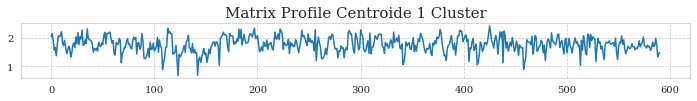

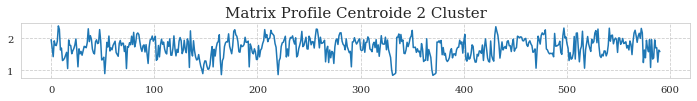

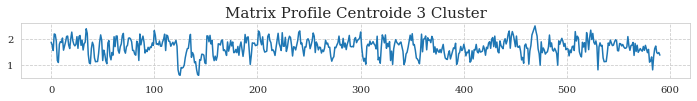

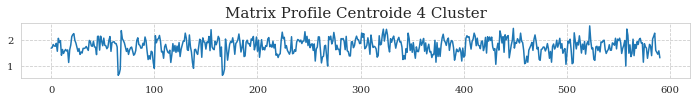

In [14]:
mp_e = []
mpi_e = []

for track, cluster in zip(cluster_euclidean.values,cluster_euclidean.index) :
    plt.figure(figsize=(12,1))
    w = 10
    
    mp, mpi = matrixProfile.stomp(track, w)
    mp_e.append(mp)
    mpi_e.append(mpi)
    plt.title("Matrix Profile Centroide {} Cluster".format(cluster+1))
    plt.plot(mp)
    plt.show()

## Motifs Centroidi Euclidean

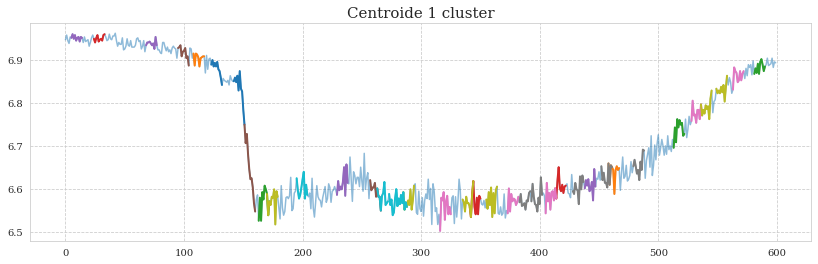

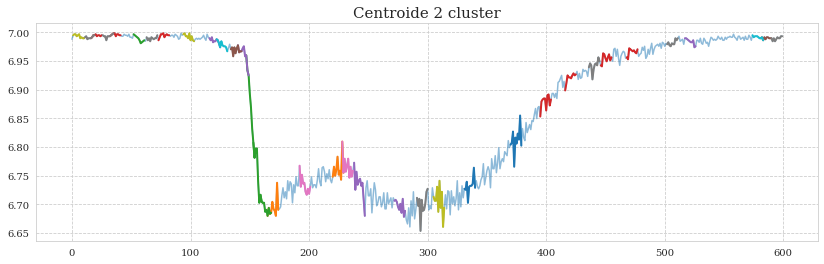

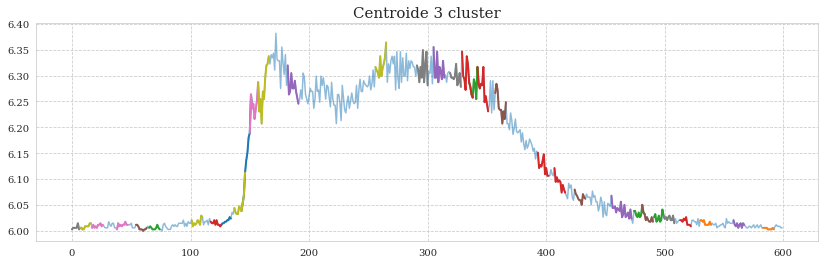

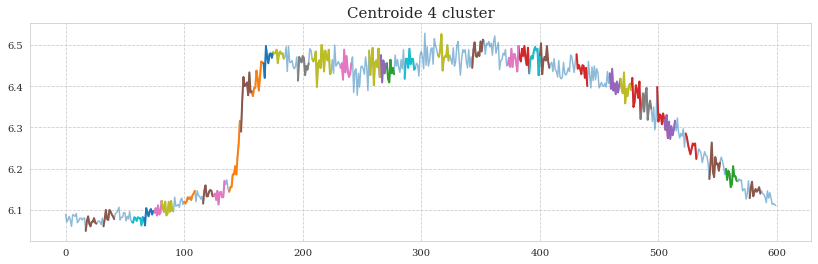

In [15]:
for track, mp, mpi,cluster in zip(cluster_euclidean.values, mp_e, mpi_e, cluster_euclidean.index):
    mo, mod  = motifs.motifs(track, (mp,mpi), max_motifs=10)
    plt.figure(figsize=(14,4))
    plt.plot(track,alpha=0.5)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = track[i:i+w]
            plt.title("Centroide {} cluster".format(cluster+1))
            plt.plot(range(i,i+w), m_shape, color=c, lw=2, alpha=1)

    plt.show()

## Analisi Motifs Primo Centroide Euclidean

In [16]:
w = 10
mp_0, mpi_0 = matrixProfile.stomp((cluster_euclidean.iloc[0]).values, w)
mo_0, mod_0  = motifs.motifs((cluster_euclidean.iloc[0]).values, (mp_0, mpi_0), max_motifs=10)

In [17]:
print('MOTIFS INDEX:', mo_0)

MOTIFS INDEX: [[123, 142], [108, 458], [163, 513, 581], [24, 341, 413], [5, 68, 229, 438], [95, 151, 257], [316, 373, 405, 528, 563], [383, 393, 428, 452, 479], [170, 285, 335, 355, 536, 549], [195, 263, 273, 279]]


In [18]:
print('MOTIFS DISTANCE:', mod_0)

MOTIFS DISTANCE: [0.6882632379073417, 0.8951047833938807, 1.034134659778817, 1.0592876727663412, 1.1272766818261162, 1.1388405452349333, 1.1741030209447563, 1.2059691542952518, 1.236729494293944, 1.2681868253781567]


MOTIFS - Centroide 1 Euclidean


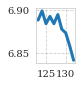

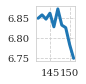

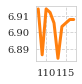

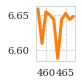

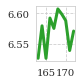

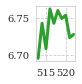

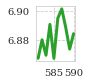

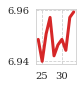

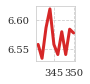

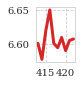

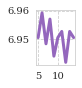

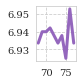

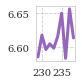

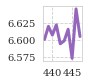

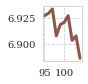

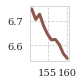

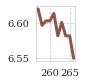

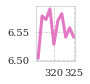

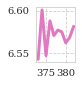

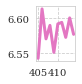

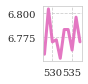

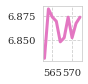

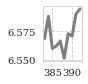

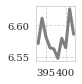

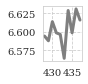

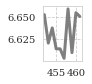

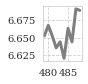

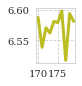

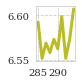

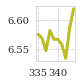

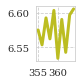

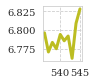

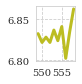

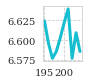

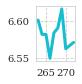

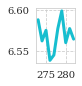

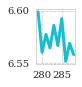

In [19]:
print('MOTIFS - Centroide 1 Euclidean')
for m, d, c in zip(mo_0, mod_0, colors):
    for i in m:
        m_shape = (cluster_euclidean.iloc[0]).values[i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Analisi Motifs Secondo Centroide Euclidean

In [20]:
w = 10
mp_1, mpi_1 = matrixProfile.stomp((cluster_euclidean.iloc[1]).values, w)
mo_1, mod_1  = motifs.motifs((cluster_euclidean.iloc[1]).values, (mp_1, mpi_1), max_motifs=10)

In [21]:
print('MOTIFS INDEX:', mo_1)

MOTIFS INDEX: [[331, 370], [165, 220], [52, 147, 153, 159], [16, 32, 73, 395, 416, 446, 468], [116, 140, 238, 272, 517], [134, 581], [192, 228], [10, 26, 63, 291, 436, 502, 590], [1, 94, 305], [122, 574]]


In [22]:
print('MOTIFS DISTANCE:', mod_1)

MOTIFS DISTANCE: [0.8460097355476048, 0.8672317929071872, 0.8990557254074136, 1.0579148312231788, 1.0688546625382245, 1.0918188622034293, 1.1098413164957022, 1.1117772179797796, 1.2165754707850631, 1.2447609118046927]


MOTIFS - Centroide 2 Euclidean


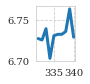

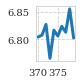

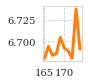

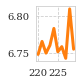

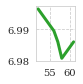

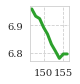

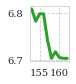

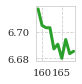

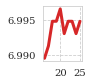

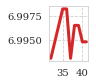

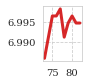

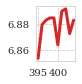

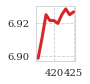

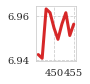

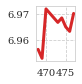

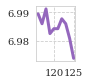

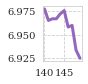

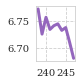

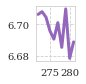

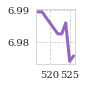

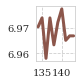

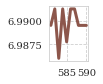

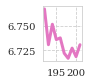

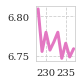

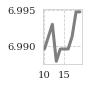

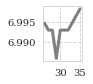

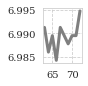

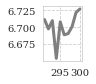

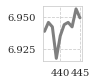

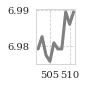

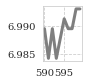

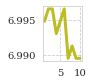

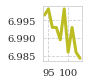

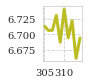

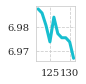

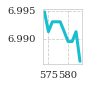

In [23]:
print('MOTIFS - Centroide 2 Euclidean')
for m, d, c in zip(mo_1, mod_1, colors):
    for i in m:
        m_shape = (cluster_euclidean.iloc[1]).values[i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Analisi Motifs Terzo Centroide Euclidean 

In [24]:
w = 10
mp_2, mpi_2 = matrixProfile.stomp((cluster_euclidean.iloc[2]).values, w)
mo_2, mod_2  = motifs.motifs((cluster_euclidean.iloc[2]).values, (mp_2, mpi_2), max_motifs=10)

In [25]:
print('MOTIFS INDEX:', mo_2)

MOTIFS INDEX: [[125, 143], [530, 583], [65, 335, 474, 491], [117, 329, 342, 393, 407, 513], [182, 305, 455, 463, 558], [54, 357, 424, 481], [17, 38, 150], [0, 291, 319, 499], [7, 101, 137, 157, 256]]


In [26]:
print('MOTIFS DISTANCE:', mod_2)

MOTIFS DISTANCE: [0.6137173185878542, 0.8211929428098945, 0.9984672272668647, 1.0259971705454294, 1.0363167207002522, 1.054509464262201, 1.0552999916290933, 1.0737650272993418, 1.1016006133931704]


MOTIFS - Centroide 3 Euclidean


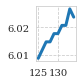

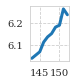

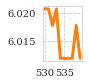

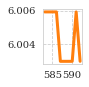

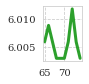

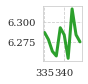

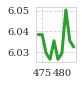

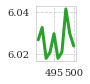

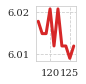

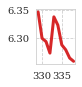

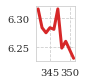

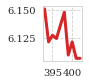

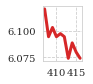

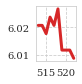

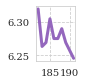

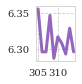

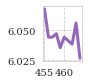

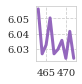

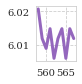

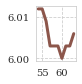

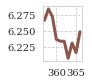

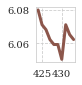

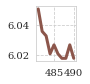

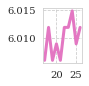

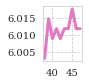

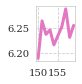

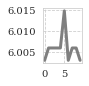

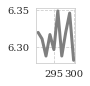

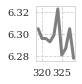

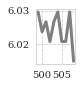

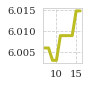

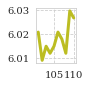

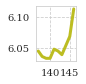

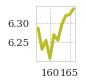

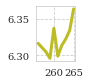

In [27]:
print('MOTIFS - Centroide 3 Euclidean')
for m, d, c in zip(mo_2, mod_2, colors):
    for i in m:
        m_shape = (cluster_euclidean.iloc[2]).values[i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Analisi Motifs Quarto Centroide Euclidean

In [28]:
w = 10
mp_3, mpi_3 = matrixProfile.stomp((cluster_euclidean.iloc[3]).values, w)
mo_3, mod_3  = motifs.motifs((cluster_euclidean.iloc[3]).values, (mp_3, mpi_3), max_motifs=10)

In [29]:
print('MOTIFS INDEX:', mo_3)

MOTIFS INDEX: [[65, 166], [100, 138, 157], [268, 557], [382, 431, 476, 499, 523], [262, 459, 505], [17, 32, 116, 148, 343, 399, 543, 577], [75, 125, 232, 373], [196, 485], [81, 175, 208, 214, 256, 314, 468], [56, 286, 391]]


In [30]:
print('MOTIFS DISTANCE:', mod_3)

MOTIFS DISTANCE: [0.6409418996529991, 0.9063694666358452, 0.9950903862979151, 1.0590261873876528, 1.0822007153251818, 1.1296077695478939, 1.1390292896024943, 1.1396608570524909, 1.1831831621174422, 1.2161012131893394]


MOTIFS - Centroide 4 Euclidean


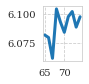

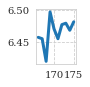

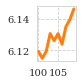

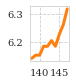

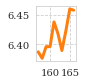

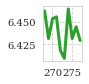

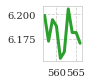

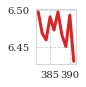

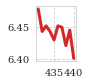

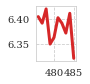

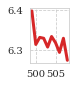

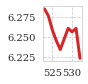

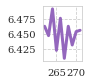

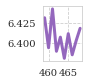

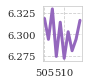

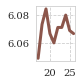

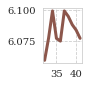

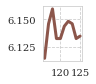

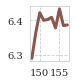

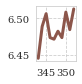

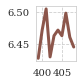

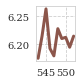

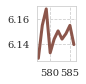

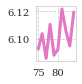

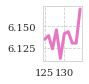

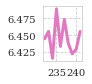

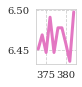

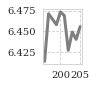

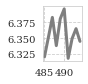

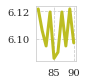

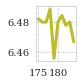

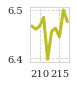

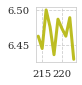

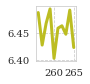

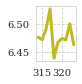

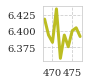

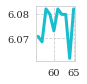

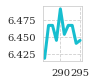

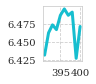

In [31]:
print('MOTIFS - Centroide 4 Euclidean')
for m, d, c in zip(mo_3, mod_3, colors):
    for i in m:
        m_shape = (cluster_euclidean.iloc[3]).values[i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Matrix Profile Centroidi Sakoe Chiba

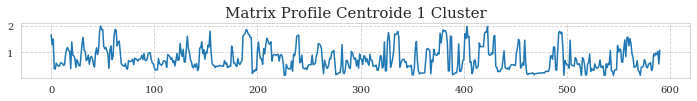

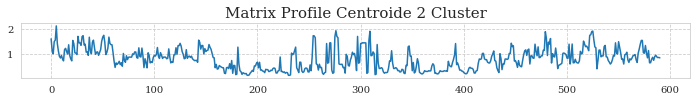

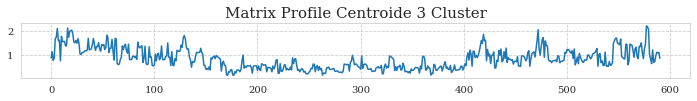

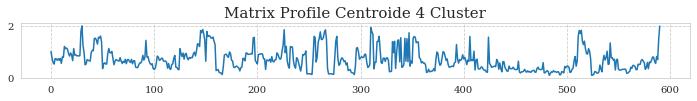

In [39]:
mp_sc = []
mpi_sc = []

for track, cluster in zip(cluster_sc.values,cluster_sc.index) :
    plt.figure(figsize=(12,1))
    w = 10
    
    mp, mpi = matrixProfile.stomp(track, w)
    mp_sc.append(mp)
    mpi_sc.append(mpi)
    plt.title("Matrix Profile Centroide {} Cluster".format(cluster+1))
    plt.plot(mp)
    plt.show()

## Motifs Centroidi Sakoe Chiba

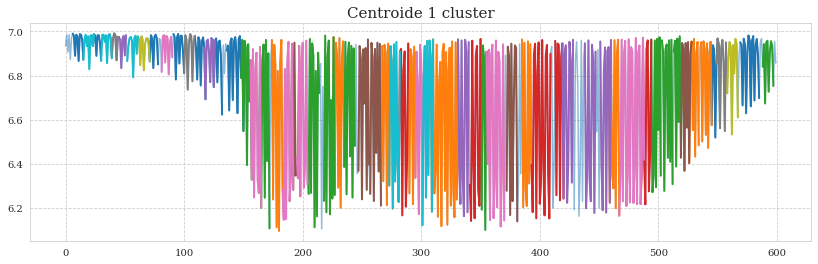

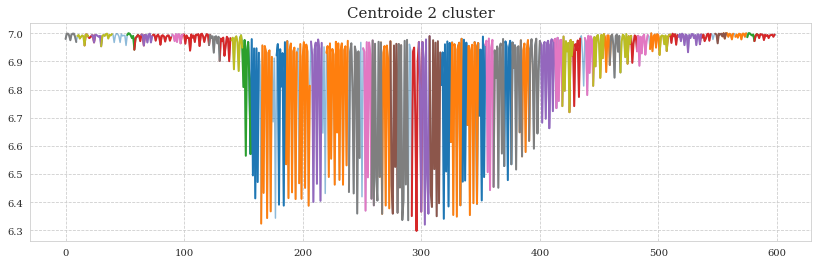

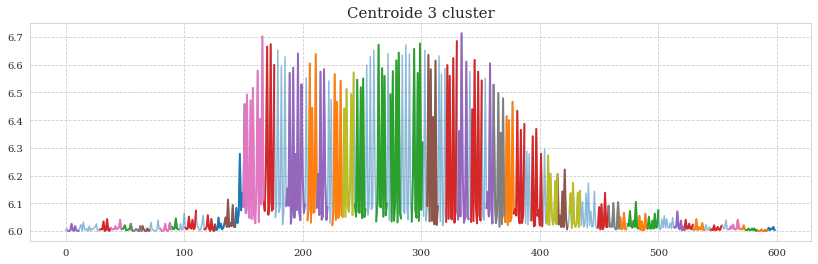

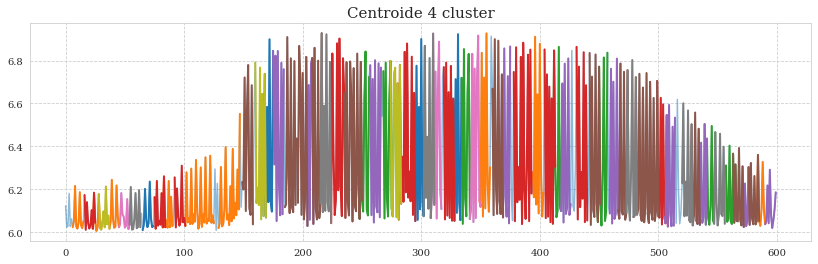

In [40]:
for track, mp, mpi,cluster in zip(cluster_sc.values, mp_e, mpi_e, cluster_sc.index):
    mo, mod  = motifs.motifs(track, (mp, mpi), max_motifs=10)
    plt.figure(figsize=(14,4))
    plt.plot(track,alpha=0.5)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = track[i:i+w]
            plt.title("Centroide {} cluster".format(cluster+1))
            plt.plot(range(i,i+w), m_shape, color=c, lw=2, alpha=1)

    plt.show()

## Analisi Motifs Primo Centroide Sakoe Chiba

In [41]:
w = 10
mp_0_sc, mpi_0_sc = matrixProfile.stomp((cluster_sc.iloc[0]).values, w)
mo_0_sc, mod_0_sc  = motifs.motifs((cluster_sc.iloc[0]).values, (mp_0_sc, mpi_0_sc), max_motifs=10)

In [42]:
print('MOTIFS INDEX:', mo_0_sc)

MOTIFS INDEX: [[545, 571], [497, 514], [226, 536], [276, 389], [462, 468], [283, 357, 475], [264, 368]]


In [43]:
print('MOTIFS DISTANCE:', mod_0_sc)

MOTIFS DISTANCE: [0.13181317670244275, 0.13247458457095432, 0.13459089208229122, 0.15755755191165008, 0.1582784477357657, 0.1857436653313279, 0.19197603471187158]


MOTIFS - Centroide 1 SAKOE CHIBA


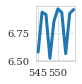

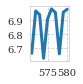

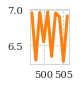

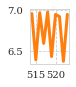

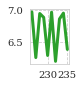

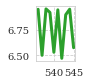

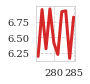

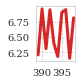

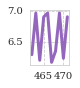

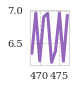

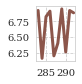

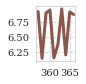

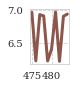

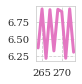

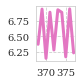

In [44]:
print('MOTIFS - Centroide 1 SAKOE CHIBA')
for m, d, c in zip(mo_0_sc, mod_0_sc, colors):
    for i in m:
        m_shape = (cluster_sc.iloc[0]).values[i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Analisi Motifs Secondo Centroide Sakoe Chiba

In [45]:
w = 10
mp_1_sc, mpi_1_sc = matrixProfile.stomp((cluster_sc.iloc[1]).values, w)
mo_1_sc, mod_1_sc  = motifs.motifs((cluster_sc.iloc[1]).values, (mp_1_sc, mpi_1_sc), max_motifs=10)

In [46]:
print('MOTIFS INDEX:', mo_1_sc)

MOTIFS INDEX: [[191, 231], [179, 314], [185, 264, 367, 382], [360, 375], [169, 343], [273, 306], [323, 337], [219, 250, 411]]


In [47]:
print('MOTIFS DISTANCE:', mod_1_sc)

MOTIFS DISTANCE: [0.13933446308342926, 0.16639328594728736, 0.17901783447787237, 0.19746437601431113, 0.2081031351949389, 0.220606682242837, 0.2243376734766013, 0.23179122666913043]


MOTIFS - Centroide 2 SAKOE CHIBA


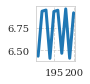

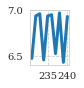

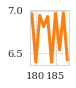

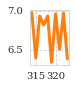

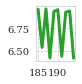

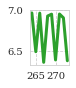

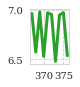

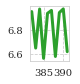

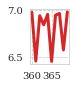

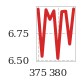

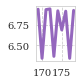

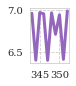

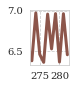

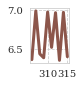

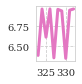

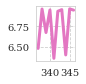

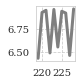

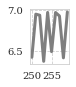

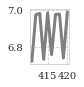

In [48]:
print('MOTIFS - Centroide 2 SAKOE CHIBA')
for m, d, c in zip(mo_1_sc, mod_1_sc, colors):
    for i in m:
        m_shape = (cluster_sc.iloc[1]).values[i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Analisi Motifs Terzo Centroide Sakoe Chiba

In [49]:
w = 10
mp_2_sc, mpi_2_sc = matrixProfile.stomp((cluster_sc.iloc[2]).values, w)
mo_2_sc, mod_2_sc  = motifs.motifs((cluster_sc.iloc[2]).values, (mp_2_sc, mpi_2_sc), max_motifs=10)

In [50]:
print('MOTIFS INDEX:', mo_2_sc)

MOTIFS INDEX: [[171, 177], [245, 263, 368], [278, 321, 388], [221, 314], [195, 214, 357], [256, 286], [183, 375, 395]]


In [51]:
print('MOTIFS DISTANCE:', mod_2_sc)

MOTIFS DISTANCE: [0.18005915089869257, 0.19195559632474823, 0.24069582354362137, 0.2602275497252894, 0.2691294175563272, 0.3226041875406954, 0.3252631503390236]


MOTIFS - Centroide 3 SAKOE CHIBA


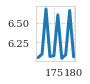

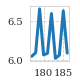

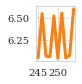

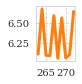

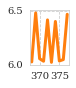

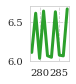

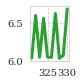

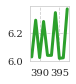

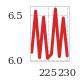

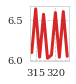

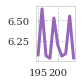

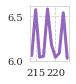

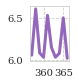

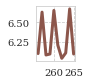

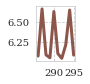

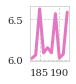

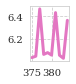

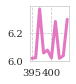

In [52]:
print('MOTIFS - Centroide 3 SAKOE CHIBA')
for m, d, c in zip(mo_2_sc, mod_2_sc, colors):
    for i in m:
        m_shape = (cluster_sc.iloc[2]).values[i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Analisi Motifs Quarto Centroide Sakoe Chiba

In [53]:
w = 10
mp_3_sc, mpi_3_sc = matrixProfile.stomp((cluster_sc.iloc[3]).values, w)
mo_3_sc, mod_3_sc  = motifs.motifs((cluster_sc.iloc[3]).values, (mp_3_sc, mpi_3_sc), max_motifs=10)

In [54]:
print('MOTIFS INDEX:', mo_3_sc)

MOTIFS INDEX: [[483, 524], [166, 294], [253, 274], [456, 530, 551, 559], [330, 364, 503], [465, 490], [183, 242, 443]]


In [55]:
print('MOTIFS DISTANCE:', mod_3_sc)

MOTIFS DISTANCE: [0.08977526220145735, 0.12257059457159566, 0.1292183636667681, 0.17186843995866266, 0.20011515057315177, 0.20272810874814423, 0.25366167639660603]


MOTIFS - Centroide 4 SAKOE CHIBA


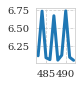

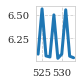

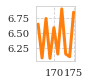

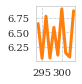

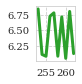

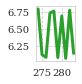

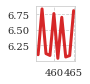

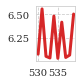

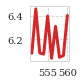

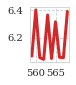

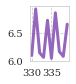

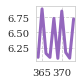

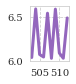

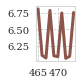

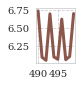

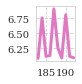

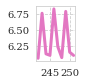

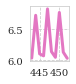

In [56]:
print('MOTIFS - Centroide 4 SAKOE CHIBA')
for m, d, c in zip(mo_3_sc, mod_3_sc, colors):
    for i in m:
        m_shape = (cluster_sc.iloc[3]).values[i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [75]:
from matrixprofile.discords import discords

## Anomalies Centroidi Euclidean

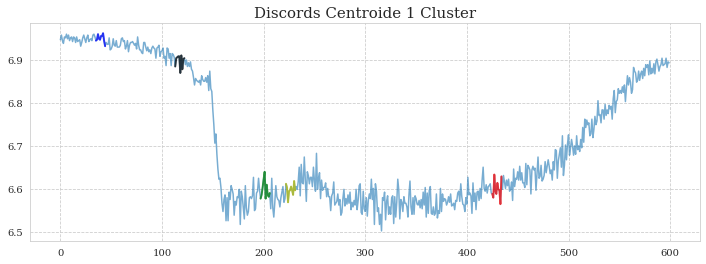

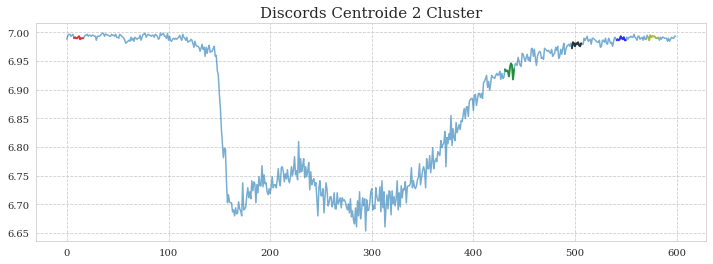

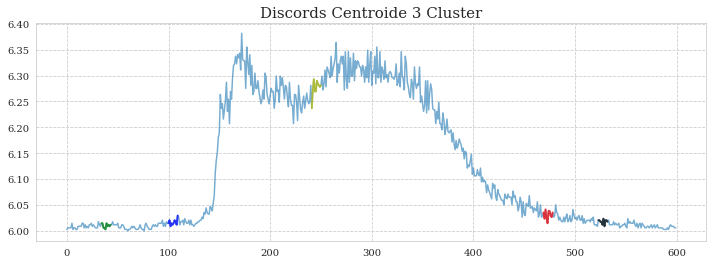

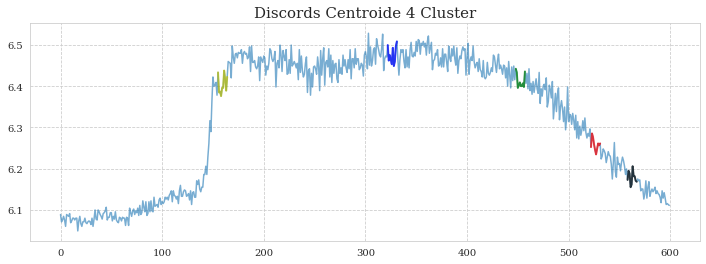

In [76]:
for track, mp, cluster in zip(cluster_euclidean.values, mp_e ,cluster_euclidean.index):
    anoms = discords(mp, ex_zone=5, k=5)
    plt.figure(figsize=(12,4))
    plt.title("Discords Centroide {} Cluster".format(cluster+1))
    plt.plot(track, alpha=0.6)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms)]
    for a, c in zip(anoms, colors):
        a_shape = track[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=2, alpha=0.7)

    plt.show()

## Anomalie Centroidi Sakoe Chiba

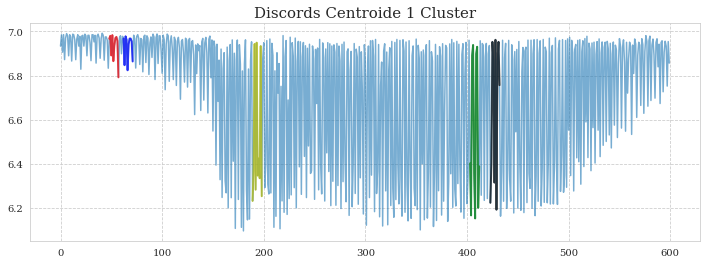

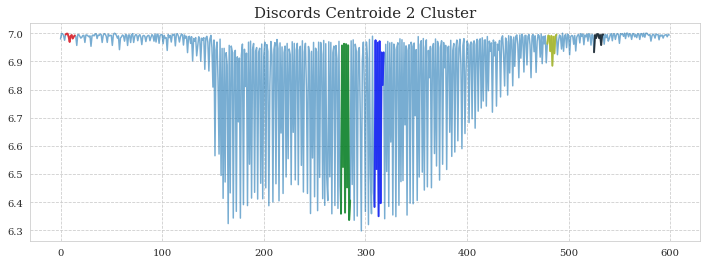

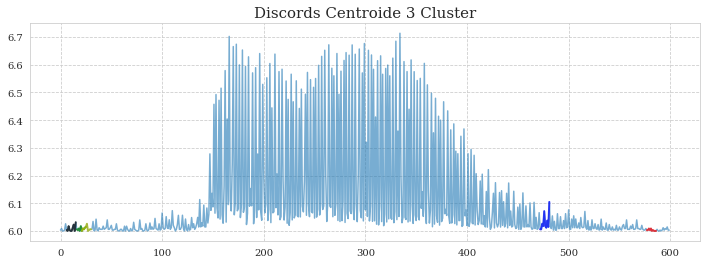

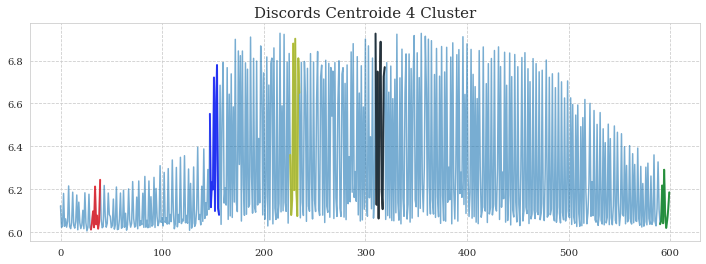

In [77]:
for track, mp, cluster in zip(cluster_sc.values, mp_sc ,cluster_sc.index):
    anoms = discords(mp, ex_zone=5, k=5)
    plt.figure(figsize=(12,4))
    plt.title("Discords Centroide {} Cluster".format(cluster+1))
    plt.plot(track, alpha=0.6)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms)]
    for a, c in zip(anoms, colors):
        a_shape = track[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=2, alpha=0.7)

    plt.show()

In [79]:
df_train = pd.read_csv("df_train.csv")

In [80]:
df_cat = pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")

In [223]:
y_train = df_cat['vocal_channel']

In [224]:
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

## Shapelets

In [225]:
n_ts = df_train.shape[0]
ts_sz = df_train.shape[1]
n_classes = len(set(y_train))

In [241]:
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.08,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 1828
ts_sz 600
n_classes 2
shapelet_sizes {48: 6}


In [85]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer=tf.optimizers.Adam(.01),
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

/Users/blertalleshi/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/tslearn/shapelets/shapelets.py:357: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  FutureWarning)


In [86]:
shp_clf.fit(df_train, y_train)

Epoch 1/200
8/8 [==============================] - 1s 32ms/step - loss: 0.7214 - binary_accuracy: 0.4327 - binary_crossentropy: 0.7067
Epoch 2/200
8/8 [==============================] - 0s 35ms/step - loss: 0.7011 - binary_accuracy: 0.5613 - binary_crossentropy: 0.6872
Epoch 3/200
8/8 [==============================] - 0s 36ms/step - loss: 0.6916 - binary_accuracy: 0.5908 - binary_crossentropy: 0.6785
Epoch 4/200
8/8 [==============================] - 0s 36ms/step - loss: 0.6862 - binary_accuracy: 0.5908 - binary_crossentropy: 0.6743
Epoch 5/200
8/8 [==============================] - 0s 37ms/step - loss: 0.6827 - binary_accuracy: 0.5908 - binary_crossentropy: 0.6725
Epoch 6/200
8/8 [==============================] - 0s 38ms/step - loss: 0.6796 - binary_accuracy: 0.5908 - binary_crossentropy: 0.6711
Epoch 7/200
8/8 [==============================] - 0s 39ms/step - loss: 0.6771 - binary_accuracy: 0.5908 - binary_crossentropy: 0.6700
Epoch 8/200
8/8 [==============================] - 0s 4

LearningShapelets(max_iter=200, n_shapelets_per_size={48: 6},
                  optimizer=<keras.optimizer_v2.adam.Adam object at 0x198f31dd8>,
                  verbose=1, weight_regularizer=0.01)

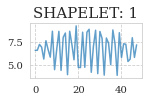

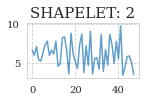

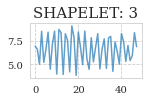

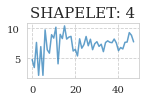

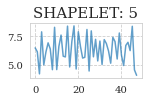

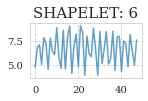

In [322]:
num_shap =[x for x in range(1,10)]
for  shapelet, i in zip(shp_clf.shapelets_, num_shap):
    
    plt.figure(figsize=(2,1))
    plt.title(f"SHAPELET: {i}")
    plt.plot(shapelet, alpha=0.7)
    plt.show()

In [323]:
predicted_locations = shp_clf.locate(cluster_euclidean)

1/1 [==============================] - 0s 16ms/step


## Analisi relazione tra shapelets e motifs trovati nei centroidi euclidean

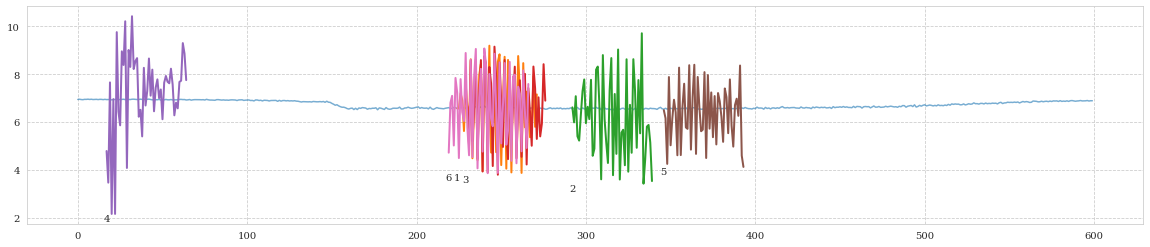

In [349]:
ts_id = 0
plt.figure(figsize=(20,4))
n_shapelets = sum(shapelet_sizes.values())
                         

lista0_euclidean = {}
plt.plot(cluster_euclidean.iloc[ts_id].values, alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    lista0_euclidean[idx_shp + 1] = t0
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    
    plt.text(t0, shp.min(), str(idx_shp + 1), ha='center', va='top')
   

In [350]:
def check_common_index(lista_motif, lista_shapelets):

    for element in lista_motif:
        for index in element:
            if index in lista_shapelets.values():
                return index

In [351]:
check_common_index(mo_0, lista0_euclidean)  ##a questo indice si ha un motif e un shapelet

229

In [352]:
def get_key_from_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None 

In [353]:
get_key_from_value(lista0_euclidean, 229)

3

In [386]:
def plot_motif(timeserie,value,ind,cl):
    plt.figure(figsize=(14,4))
    plt.plot(timeserie.values,alpha=0.5)
    m_shape = (timeserie)[ind:ind+10]
    plt.title("Centroide {} cluster con shapelet".format(cl))
    plt.plot(range(ind,ind+10), m_shape,  lw=2, alpha=1)
    plt.plot(np.arange(ind, ind + len(shp)),shp_clf.shapelets_[value], alpha=0.7)
    plt.show()

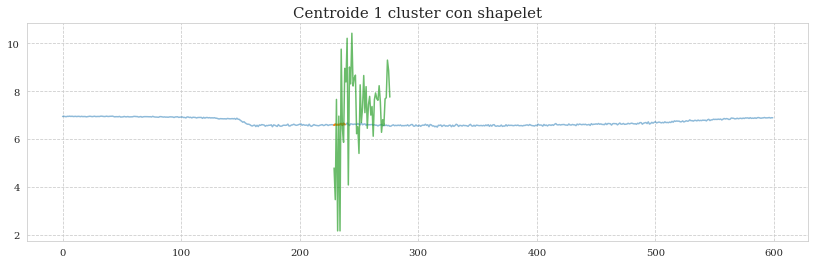

In [387]:
plot_motif(cluster_euclidean.iloc[0],3,229,1)

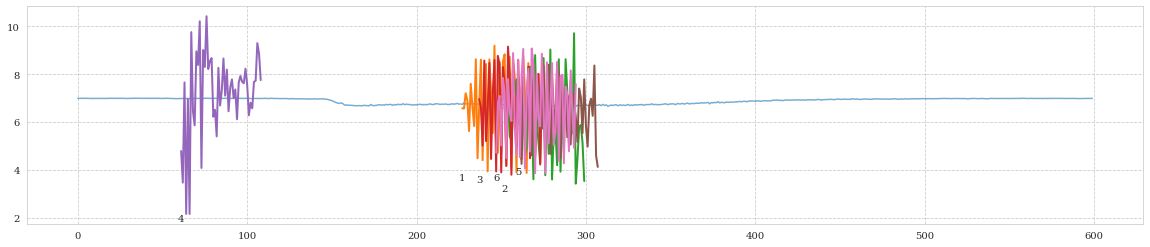

In [315]:
ts_id = 1
plt.figure(figsize=(20,4))
n_shapelets = sum(shapelet_sizes.values())

lista1_euclidean = {}
plt.plot(cluster_euclidean.iloc[ts_id].values, alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    lista1_euclidean[idx_shp + 1] = t0
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    plt.text(t0, shp.min(), str(idx_shp + 1), ha='center', va='top')
    

In [317]:
check_common_index(mo_1, lista1_euclidean) #nessuno dei motifs trovati nel centroide del secondo cluster inizia 
                                           #allo stesso indice di uno shapelet

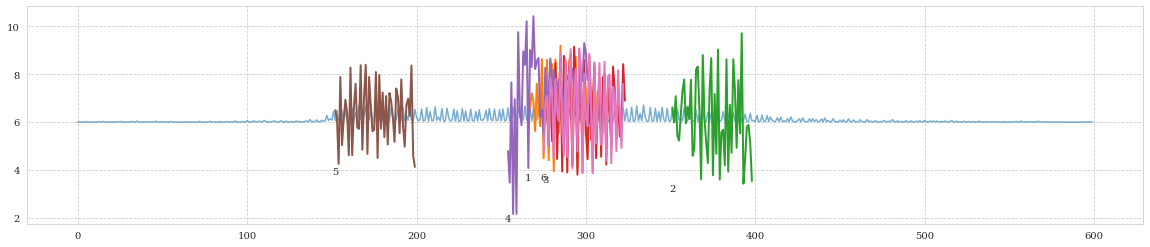

In [318]:
ts_id = 2
plt.figure(figsize=(20,4))
n_shapelets = sum(shapelet_sizes.values())

lista2_euclidean = {}
plt.plot(cluster_sc.iloc[ts_id].values, alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    lista2_euclidean[idx_shp + 1] = t0
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    plt.text(t0, shp.min(), str(idx_shp + 1), ha='center', va='top')

In [319]:
check_common_index(mo_2, lista2_euclidean) #nessuno dei motifs trovati nel centroide del terzo cluster inizia 
                                           #allo stesso indice di uno shapelet

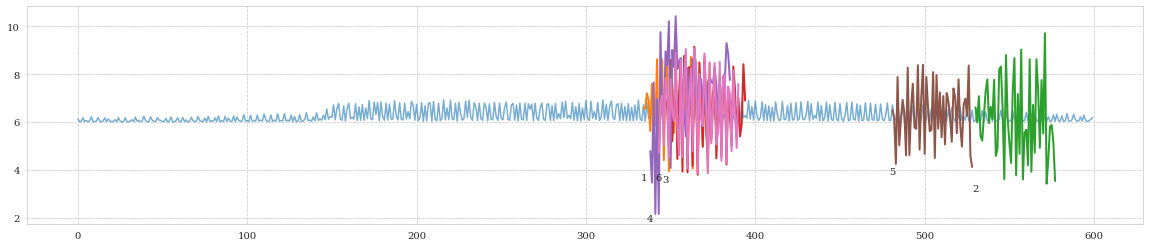

In [320]:
ts_id = 3
plt.figure(figsize=(20,4))
n_shapelets = sum(shapelet_sizes.values())

lista3_euclidean = {}
plt.plot(cluster_sc.iloc[ts_id].values, alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    lista3_euclidean[idx_shp + 1] = t0
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    plt.text(t0, shp.min(), str(idx_shp + 1), ha='center', va='top')

In [321]:
check_common_index(mo_3, lista2_euclidean)  #nessuno dei motifs trovati nel centroide del terzo cluster inizia 
                                           #allo stesso indice di uno shapelet

In [324]:
predicted_locations_sc = shp_clf.locate(cluster_sc)

1/1 [==============================] - 0s 17ms/step


## Analisi relazione tra shapelets e motifs trovati nei centroidi sakoe chiba

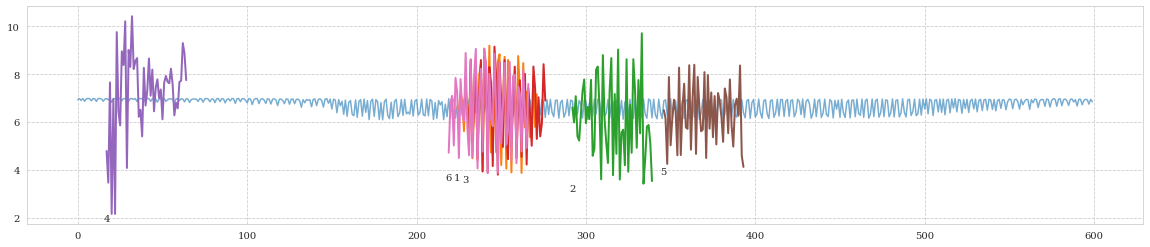

In [325]:
ts_id = 0
plt.figure(figsize=(20,4))
n_shapelets = sum(shapelet_sizes.values())
                         

lista0_sc = {}
plt.plot(cluster_sc.iloc[ts_id].values, alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    lista0_sc[idx_shp + 1] = t0
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    
    plt.text(t0, shp.min(), str(idx_shp + 1), ha='center', va='top')

In [327]:
check_common_index(mo_0_sc, lista0_sc)  #nessuno dei motifs trovati nel centroide del primo cluster inizia 
                                           #allo stesso indice di uno shapelet

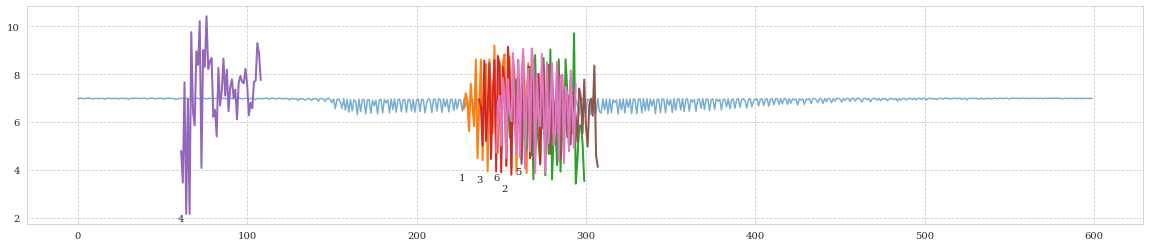

In [328]:
ts_id = 1
plt.figure(figsize=(20,4))
n_shapelets = sum(shapelet_sizes.values())
                         

lista1_sc = {}
plt.plot(cluster_sc.iloc[ts_id].values, alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    lista1_sc[idx_shp + 1] = t0
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    
    plt.text(t0, shp.min(), str(idx_shp + 1), ha='center', va='top')

In [330]:
check_common_index(mo_1_sc, lista1_sc)  #nessuno dei motifs trovati nel centroide del primo cluster inizia 
                                           #allo stesso indice di uno shapelet

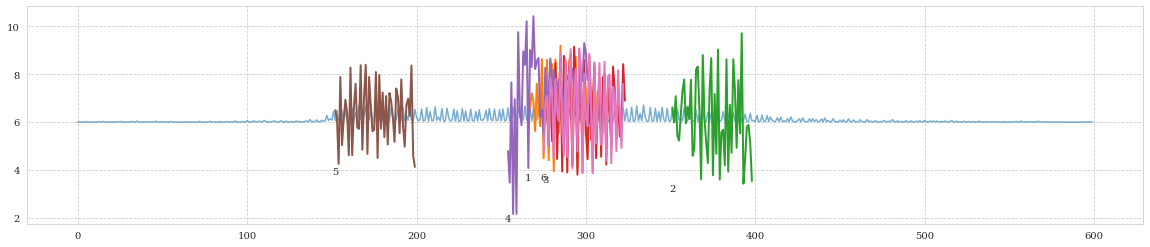

In [331]:
ts_id = 2
plt.figure(figsize=(20,4))
n_shapelets = sum(shapelet_sizes.values())
                         

lista2_sc = {}
plt.plot(cluster_sc.iloc[ts_id].values, alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    lista2_sc[idx_shp + 1] = t0
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    
    plt.text(t0, shp.min(), str(idx_shp + 1), ha='center', va='top')

In [385]:
check_common_index(mo_2_sc, lista2_sc)    #nessuno dei motifs trovati nel centroide del primo cluster inizia 
                                           #allo stesso indice di uno shapelet

334
530
347
338
481
343


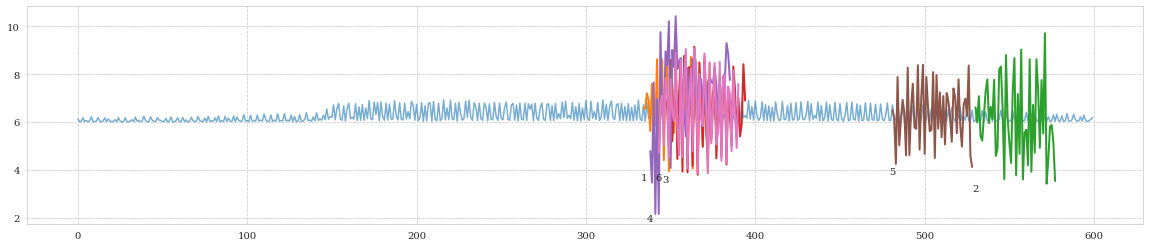

In [378]:
ts_id = 3
plt.figure(figsize=(20,4))
n_shapelets = sum(shapelet_sizes.values())
                         

lista3_sc = {}
plt.plot(cluster_sc.iloc[ts_id].values, alpha=0.6)
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    lista3_sc[idx_shp + 1] = t0
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    
    plt.text(t0, shp.min(), str(idx_shp + 1), ha='center', va='top')

In [384]:
check_common_index(mo_3_sc, lista3_sc)  ##a questo indice si ha un motif e un shapelet

530

In [373]:
get_key_from_value(lista3_sc, 530)

2

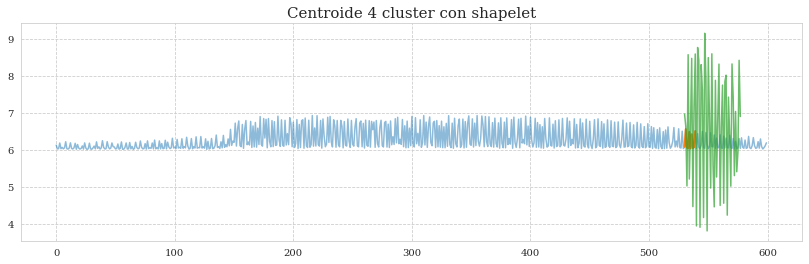

In [388]:
plot_motif(cluster_sc.iloc[3],2,530,4)